# Tao Izzo Elvira

In [1]:
# import some libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# seaborn is a layer on top of matplotlib which has additional visualizations -
# just importing it changes the look of the standard matplotlib plots.
# the current version also shows some warnings which we'll disable.
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline

### Get Data

In [2]:
# get data and show some records

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


#data = data.drop('Id', axis=1) # get rid of the Id column - don't need it
data.sample(5)

,sepal length,sepal width,petal length,petal width,target
74,6.4,2.9,4.3,1.3,Iris-versicolor
139,6.9,3.1,5.4,2.1,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
88,5.6,3.0,4.1,1.3,Iris-versicolor
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# split data into features (X) and labels (y)
X = data.iloc[:,0:4]
y = data.iloc[:,-1]

print("\n Caracteristicas \n")
print(X.sample(5))
print("\n Target \n")
print(y.sample(5))


 Caracteristicas 

     sepal length  sepal width  petal length  petal width
132           6.4          2.8           5.6          2.2
100           6.3          3.3           6.0          2.5
128           6.4          2.8           5.6          2.1
129           7.2          3.0           5.8          1.6
111           6.4          2.7           5.3          1.9

 Target 

78     Iris-versicolor
114     Iris-virginica
8          Iris-setosa
54     Iris-versicolor
144     Iris-virginica
Name: target, dtype: object


### Visualize Data

In [4]:
data["target"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

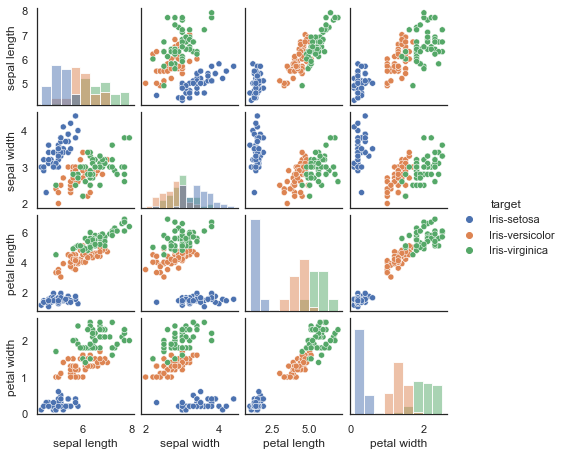

In [5]:
sns.pairplot(data, hue="target", diag_kind="hist", size=1.6);

Versicolor y Virginica son muy similares, sera muy dificil generar un algoritmo de clustering que las pueda separar, pero vamos a intentarlo!! 

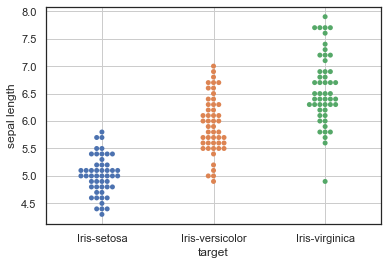

In [6]:
sns.swarmplot(x="target", y="sepal length", data=data)
plt.grid()

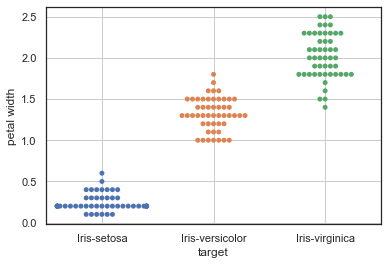

In [7]:
sns.swarmplot(x="target", y="petal width", data=data)
plt.grid()

### Feature Scaling

Los datos estan desbalanceados por ejemplo Sepal Lenght es aproximadamente 4 veces mas grande que Petal Width, 
por lo tando recomiendo escalar los valores.
de lo contrario, las características más grandes dominarán a las demás en la agrupación, etc.

# Celda para completar código

In [8]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

#INCORPORAR AQUI LAS LINEAS FALTANTES PARA GENERAR UN DATASET CON LAS CARACTERISITCAS ESCALADAS

X_scaled_array = scaler.fit_transform(X)


#
#
#
# GENERAR UN VECTOR CON LOS VALORES DE X ESCALADOS LLAMADO X_scaled_array
# EN EL OUTPUT PUEDEN VER COMO DEBERIA QUEDAR EL DATAFRAME
#
#
#


#INCORPORAR AQUI LAS LINEAS FALTANTES PARA GENERAR UN DATASET CON LAS CARACTERISITCAS ESCALADAS

X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(10)

,sepal length,sepal width,petal length,petal width
63,0.310998,-0.356361,0.535296,0.264699
136,0.553333,0.800654,1.047087,1.579429
142,-0.052506,-0.819166,0.762759,0.922064
79,-0.173674,-1.050569,-0.147093,-0.261193
40,-1.021849,1.032057,-1.398138,-1.181504
69,-0.294842,-1.281972,0.080370,-0.129720
144,1.038005,0.569251,1.103953,1.710902
19,-0.900681,1.726266,-1.284407,-1.181504
2,-1.385353,0.337848,-1.398138,-1.312977
56,0.553333,0.569251,0.535296,0.527645


In [10]:
# Prueba de escalado
X_scaled_array
X_scales_arraydf = pd.DataFrame(data = X_scaled_array ,  columns = X.columns)
X_scales_arraydf

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


### Silhouette score & Elbow Method

un valor cercano a +1 indica que la muestra está lejos de los conglomerados vecinos. Un valor de 0 indica que la muestra se encuentra en el límite de decisión entre dos conglomerados vecinos o muy cerca del mismo, y los valores negativos indican que es posible que esas muestras se hayan asignado al conglomerado equivocado.

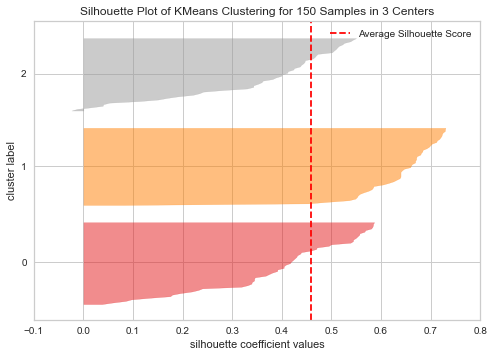

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
# Instantiate the clustering model and visualizer 
#pip install yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

nclusters = 3
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data

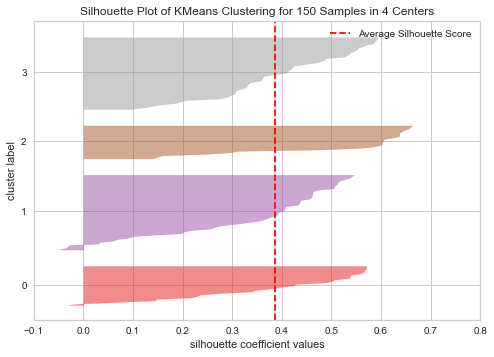

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
# Instantiate the clustering model and visualizer 
#pip install yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

nclusters = 4
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data

Se puede observar que con 3 cluster se obtiene un promedio de score de silueta de 0,47 y con 4 clusters un score de 0,39 aproximadamente, por lo tanto se recomienda entrenar un modelo de clustering con 3 clusters

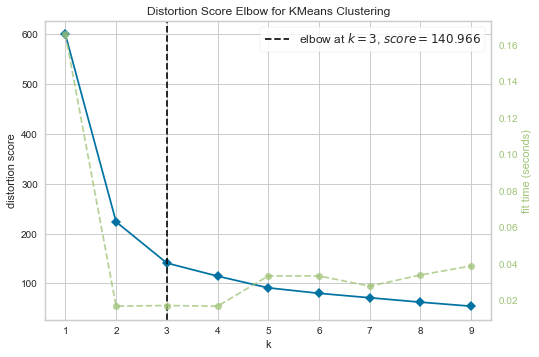

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
#from sklearn import datasets
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer

seed = 0

km = KMeans(init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = KElbowVisualizer(km, k=(1,10))
 
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()               # Finalize and render the figure

Observamos por el metodo de ELBOW que tenemos que utilizar un K=3 es decir 3 clusters.

### K-Means

Intente agrupar los datos en 4D y ver si puede reproducir los clústeres reales. Es decir, imagine que no tenemos las etiquetas de especies en estos datos y queremos dividir las flores en especies. podría establecer un número arbitrario de grupos 
e intentar dividirlos en grupos similares. Sabemos que hay 3 especies, así que encontremos 3 especies y veamos 
si las predicciones para cada punto coinciden con la etiqueta en y, por otro lado sabemos que por el metodo de las siluetas y elbow, la cantidad de clusters recomendada es 3

# Celda para completar código

In [14]:
# Prueba por separado 
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

In [15]:
# Definicion de Kmenas
km = KMeans(nclusters)
km.fit(X_scaled)

KMeans(n_clusters=3)

In [16]:
# Ver sus centros
km.cluster_centers_

array([[ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327]])

In [17]:
# ver los grupos que ha decidido
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [18]:
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

#DESARROLLE AQUI EL METODO DE KMeans utilizando la libreia KMeans.
km = KMeans(nclusters)
km.fit(X_scaled)

#Complete aqui, llamando al metodo de K-means para entrenar el modelo utilizando las variables ncluster y seed
#Utilice X_Scaled para entrenar el modelo
#
#
#   km = KMeans(???)
#   km.fit(???)
#
#
#
#
#DESARROLLE AQUI EL METODO DE KMeans utilizando la libreia KMeans.



# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)





print("\n Caracteristicas \n")
print(X_scaled)

print("\n\n\n Clusters \n")
print(y_cluster_kmeans)


 Caracteristicas 

     sepal length  sepal width  petal length  petal width
0       -0.900681     1.032057     -1.341272    -1.312977
1       -1.143017    -0.124958     -1.341272    -1.312977
2       -1.385353     0.337848     -1.398138    -1.312977
3       -1.506521     0.106445     -1.284407    -1.312977
4       -1.021849     1.263460     -1.341272    -1.312977
..            ...          ...           ...          ...
145      1.038005    -0.124958      0.819624     1.447956
146      0.553333    -1.281972      0.705893     0.922064
147      0.795669    -0.124958      0.819624     1.053537
148      0.432165     0.800654      0.933356     1.447956
149      0.068662    -0.124958      0.762759     0.790591

[150 rows x 4 columns]



 Clusters 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1

### Principal Component Analysis (PCA)


Si tiene muchas característics, puede ser útil reducir algunas características, para evitar la maldición de la dimensionalidad (es decir, necesitar exponencialmente más datos para hacer predicciones precisas a medida que crece la cantidad de características). 
Puede hacer esto con el análisis de componentes principales (PCA), que reasigna los datos a un nuevo sistema de coordenadas (más pequeño) que trata de dar cuenta de la mayor información posible. puedes *también* usar PCA para visualizar los datos al reducir las # características a 2 dimensiones y hacer un diagrama de dispersión.

En este caso recomiendo usar PCA para poder visualizar los datos, ya entrenamos el modelo de K-means y tenemos los clusters identificados, ahora transformemos de 4D a 2D las caracteristicas. para solo visualizarlas en un grafico, y poder observar los CLUSTERS.

# Celda para completar código

In [19]:
# Prueba por separado 
from sklearn.decomposition import PCA
ndimensions = 2

In [20]:
pca = PCA(n_components = ndimensions)
pca.fit(X_scaled)
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [21]:
X_pca_array = pca.transform(X_scaled)

In [22]:
X_scaled.shape

(150, 4)

In [23]:
X_pca_array.shape

(150, 2)

In [24]:
X_pca_array

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

In [25]:
from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components = ndimensions)
pca.fit(X_scaled)
pca.explained_variance_ratio_

X_pca_array = pca.transform(X_scaled)

#Aplique un algoritmo de PCA en X_scaled, para pasar de 4 a 2 dimensiones, puede utilizar la variable ndimension
#
#
#  pca = PCA(???)  
#  pca.fit(???)
#  X_pca_array = pca.transform(???)
#
#
#Aplique un algoritmo de PCA en X_scaled, para pasar de 4 a 2 dimensiones, puede utilizar la variable ndimension

X_pca = pd.DataFrame(X_pca_array, columns=['principal component 1','principal component 2']) 


print(X_pca.sample(10))
explained_variance = pca.explained_variance_ratio_
print("\n\n explained_variance")
print(explained_variance)

     principal component 1  principal component 2
46               -2.381258               1.150633
87                1.035878              -1.392466
8                -2.341958              -1.095146
5                -2.070537               1.518549
141               1.903117               0.686025
112               1.884252               0.414333
128               1.786009              -0.193273
97                0.573883              -0.153720
20               -1.914556               0.430465
12               -2.224083              -0.709118


 explained_variance
[0.72770452 0.23030523]


Tenemosnuevas coordenadas 2D para cada punto de datos. 
En este punto, si no tiene datos etiquetados, puede agregar los ID de clúster de k-means a esta tabla y hacer un 
diagrama de dispersión de colores. en realidad tenemos etiquetas para los puntos de datos, pero imaginemos que 
no las tenemos, y usemos las etiquetas pronosticadas para ver cómo se ven las predicciones. 



In [26]:
finalDf = pd.concat([X_pca, data[['target']]], axis = 1)
finalDf.head()

finalDf['ClusterKmeans'] = y_cluster_kmeans
finalDf.sample(10)

,principal component 1,principal component 2,target,ClusterKmeans
3,-2.304197,-0.575368,Iris-setosa,0
109,2.267555,1.921443,Iris-virginica,1
85,0.431783,0.855137,Iris-versicolor,1
24,-2.228217,0.162186,Iris-setosa,0
32,-2.608203,1.828475,Iris-setosa,0
104,1.867891,0.291193,Iris-virginica,1
117,2.437378,2.556757,Iris-virginica,1
36,-2.044417,0.684956,Iris-setosa,0
60,-0.124697,-2.658063,Iris-versicolor,2
68,1.215303,-1.633356,Iris-versicolor,2


Text(0, 0.5, 'Segundo Componente Principal')

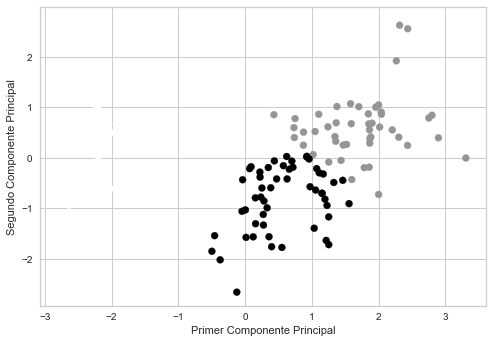

In [47]:
# Aparecen los 3 pero uno como es blanco no se logra distinguir
finalarray=finalDf.to_numpy()
plt.scatter(finalarray[:,0],finalarray[ :,1], c=finalarray[ :,3])
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')

Text(0, 0.5, 'Segundo Componente Principal')

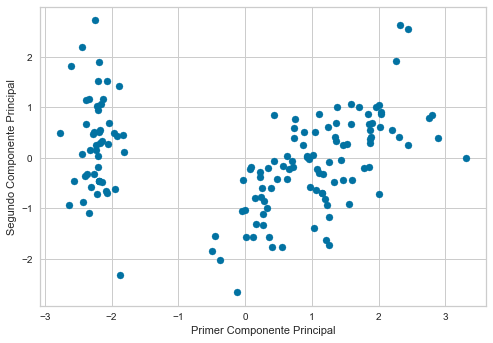

In [45]:
finalarray=finalDf.to_numpy()
plt.scatter(finalarray[:,0],finalarray[ :,1])
plt.xlabel('Primer Componente Principal')
plt.ylabel('Segundo Componente Principal')

In [32]:
finalDf.target.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

### Grafica de Dispersion (TARGET)

En esta grafica visualizaremos todos los puntos, en donde los ejes son los componentes principales obtenidos de aplicar PCA al dataset escalado, y cada punto se visualizara pintado con colores asociados a la etiqueta o target, ya que partimos de un dataset etiquetado.

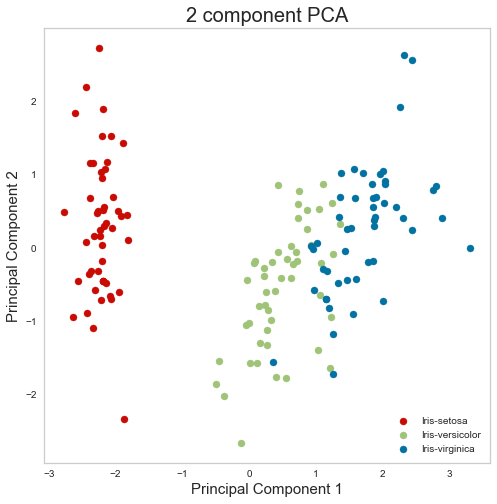

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Grafica de Dispersion (CLUSTERS)

En esta grafica visualizaremos todos los puntos, en donde los ejes son los componentes principales obtenidos de aplicar PCA al dataset escalado, y cada punto se visualizara pintado con colores asociados al CLUSTER obtenido luego de aplicar K-MEANS, como se puede comparar con los datos etiquetados, los clusters se ASEMEJAN BASTANTE.

Un mecanismo asi puede ser utilizado para etiquetar flores, cuando no tenemos la etiqueta de antemano, incluso nos puede servir para generar clasificaciones mas especificas.

Como aclaramos desde el principio, la division entre Versicolor y Virginica es muy fina, y en ambos graficos es costoso encontrar una division clara.

La division real, basada en los datos etiquetados de antemano, es por una linea VERTICAL al medio del conjunto de datos, en cambio segun K-means, la division es por una linea horizontal a traves de los datos.

En estos casos la realidad difiere un poco, de lo que establece un algoritmo matematico. Seguramente para obtener una mejor division sea necesario contar con mas caracteristicas.

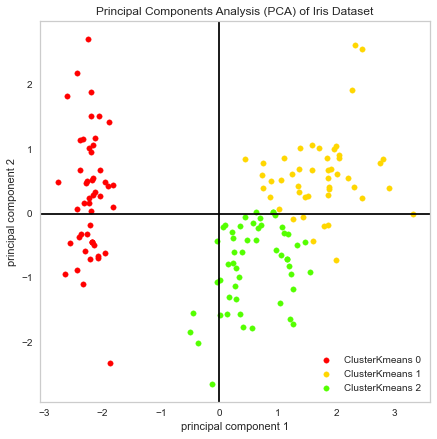

In [29]:
# so now we can make a 2d scatterplot of the clusters
# first define a plot fn

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'principal component 1', y = 'principal component 2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");
    
# plot the clusters each datapoint was assigned to
plotData(finalDf, 'ClusterKmeans')
    

## Introduzca una conclusión de los resultados obtenidos

#CONCLUSION DEL ANALISIS DESARROLLADO:
El análisis exploratorio de datos (Get data) Nos introduce a los datos, se puede observar que los datos están balanceados por lo cual el aprendizaje no supervisado será muy asertivo gracias a esto. Al escalar los datos hacemos que los que estén mas dispersos o sean outliers no afecten y gracias al Silhouette vemos que es mejor tener 3 clusters que 4.

Entrando a Kmeans se logra apreciar gracias al escalado la clasificación de clusters que da al ejecutar el código, este clúster toma en cuenta las 4 columnas o características de Iris y el pca reduce las 4 variables a solo dos, en el grafico se puede observar las características de los componente y podemos inferir en como agrupa de una mejor manera estas flores.

Con respecto a los dos siguientes gráficos se observa como aplicando los 2 componentes del pca se clasifican en si las 3 especies, no tan marcado en le Target pero si en el clusters, pues la división se aprecia de una mejor manera 

Extras: me hubiera gustado comparar graficamente kmenas como lo hice ne le pca pero no pude graficarlo, siento que la graficacion nos ayud a entender de una mejor manera como funcioonan los clusters o que tan diferentes son, el escalado creo que es lo mas relevante a la hora de hacer el aprendizaje no supervisado porque ne base  aello se definen los clusters.